In [1]:
# 處理 outliers
# 新增欄位註記
# outliers 或 NA 填補
# 平均數 (mean)
# 中位數 (median, or Q50)
# 最大/最小值 (max/min, Q100, Q0)
# 分位數 (quantile)

In [5]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [6]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# 如果欄位中有 NA, describe 會有問題
app_train['AMT_ANNUITY'].describe()
app_train[~app_train['AMT_ANNUITY'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_Norm1,AMT_CREDIT_Norm2
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.000,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.478119,0.090287
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.000,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.725683,0.311736
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.000,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.152990,0.022472
3,100006.0,0.0,Cash loans,F,N,Y,0.0,135000.000,312682.5,29686.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.711481,0.066837
4,100007.0,0.0,Cash loans,M,N,Y,0.0,121500.000,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.213727,0.116854
5,100008.0,0.0,Cash loans,M,N,Y,0.0,99000.000,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.269647,0.111235
6,100009.0,0.0,Cash loans,F,Y,Y,1.0,171000.000,1560726.0,41301.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.389687,0.378458
7,100010.0,0.0,Cash loans,M,Y,Y,0.0,360000.000,1530000.0,42075.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.313338,0.370787
8,100011.0,0.0,Cash loans,F,N,Y,0.0,112500.000,1019610.0,33826.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.045109,0.243348
9,100012.0,0.0,Revolving loans,M,N,Y,0.0,135000.000,405000.0,20250.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.482088,0.089888


In [20]:
# Ignore NA, 計算五值
five_num = [0, 25, 50, 75, 100]
## 計算5個百分比分位數 0%, 25%, 50%, 75%, 100%
quantile_5s = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in five_num]
print(quantile_5s)

[1615.5, 16524.0, 24903.0, 34596.0, 230161.5]


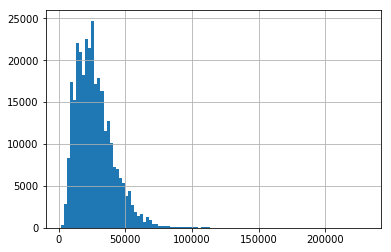

In [21]:
app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'].hist(bins = 100, )
plt.show()

In [11]:
# 試著將 max 取代為 q99
app_train[app_train['AMT_ANNUITY'] == app_train['AMT_ANNUITY'].max()] = np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = 99)

In [12]:
five_num = [0, 25, 50, 75, 100]
quantile_5s = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in five_num]
print(quantile_5s)

[1615.5, 16524.0, 24903.0, 34596.0, 230161.5]


In [13]:
# 得到 median 的另外一種方法
np.median(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'])

24903.0

In [14]:
# 計算眾數 (mode)
from scipy.stats import mode
import time

start_time = time.time()
mode_get = mode(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'])
print(mode_get)
print("Elapsed time: %.3f secs" % (time.time() - start_time))

ModeResult(mode=array([9000.]), count=array([6385]))
Elapsed time: 6.581 secs


In [19]:
# 計算眾數 (mode)
# 較快速的方式
from collections import defaultdict

start_time = time.time()
mode_dict = defaultdict(lambda:0)

for value in app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY']:
    mode_dict[value] += 1
    
mode_get = sorted(mode_dict.items(), key=lambda kv: kv[1], reverse=True)
print(mode_get[0])
print("Elapsed time: %.3f secs" % (time.time() - start_time))

(9000.0, 6385)
Elapsed time: 0.316 secs


In [ ]:
# 連續值標準化
# 1. Z-transform: $ \frac{(x - mean(x))}{std(x)} $
# 2. Range (0 ~ 1): $ \frac{x - min(x)}{max(x) - min(x)} $
# 3. Range (-1 ~ 1): $ (\frac{x - min(x)}{max(x) - min(x)} - 0.5) * 2 $

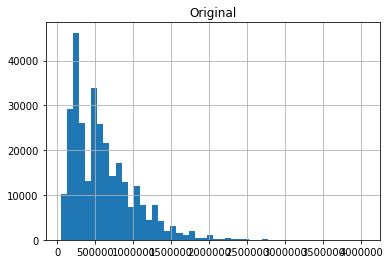

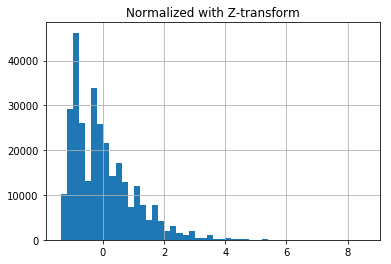

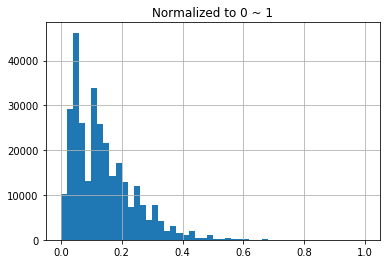

In [17]:
# 以 AMT_CREDIT 為例
app_train['AMT_CREDIT'].hist(bins = 50)
plt.title("Original")
plt.show()
value = app_train['AMT_CREDIT'].values

app_train['AMT_CREDIT_Norm1'] = ( value - np.mean(value) ) / ( np.std(value) )
app_train['AMT_CREDIT_Norm1'].hist(bins = 50)
plt.title("Normalized with Z-transform")
plt.show()

app_train['AMT_CREDIT_Norm2'] = ( value - min(value) ) / ( max(value) - min(value) )
app_train['AMT_CREDIT_Norm2'].hist(bins = 50)
plt.title("Normalized to 0 ~ 1")
plt.show()